<center><h1> Project : Household Power Consumption</h1></center>

### Dataset :Household Power Consumption

## Objective of the project:
### a.Develop a Machine Learning model to predict the Global Intensity
### b.Develop a Machine Learning model to predict if the Global Intensity is greater than 15.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from copy import deepcopy

## Data Loading

In [2]:
file="hpc_breakdowns.csv"

In [3]:
df=pd.read_csv(file, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[1,2]})

## Data Analysis

In [4]:
df.head()

,datetime,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.shape

(2049280, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
datetime                 datetime64[ns]
Unnamed: 0               int64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 140.7 MB


In [7]:
sf=deepcopy(df)
df.set_index(['datetime'],drop=True)
df.isnull().sum()

datetime                    0
Unnamed: 0                  0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

In [8]:
sf.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
sf.corr()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,-0.041909,0.053475,0.249402,-0.045774,-0.014440,-0.037933,0.054314
Global_active_power,-0.041909,1.000000,0.247178,-0.399832,0.998888,0.484539,0.434499,0.638579
Global_reactive_power,0.053475,0.247178,1.000000,-0.112356,0.266142,0.123149,0.139202,0.089658
Voltage,0.249402,-0.399832,-0.112356,1.000000,-0.411515,-0.195964,-0.167426,-0.268091
Global_intensity,-0.045774,0.998888,0.266142,-0.411515,1.000000,0.489331,0.440349,0.626461
Sub_metering_1,-0.014440,0.484539,0.123149,-0.195964,0.489331,1.000000,0.054746,0.102525
Sub_metering_2,-0.037933,0.434499,0.139202,-0.167426,0.440349,0.054746,1.000000,0.080921
Sub_metering_3,0.054314,0.638579,0.089658,-0.268091,0.626461,0.102525,0.080921,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
datetime                 datetime64[ns]
Unnamed: 0               int64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 140.7 MB


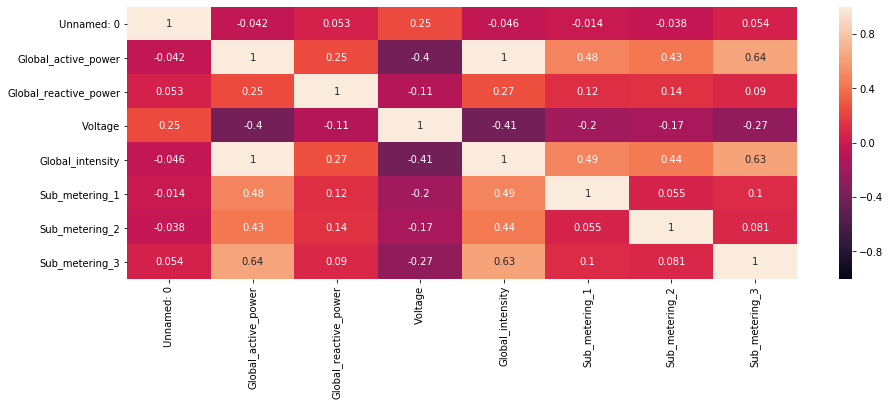

In [28]:
plt.figure(figsize=[15,5])
ax = sb.heatmap(sf.corr(), annot=True, vmin=-1, vmax=1) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

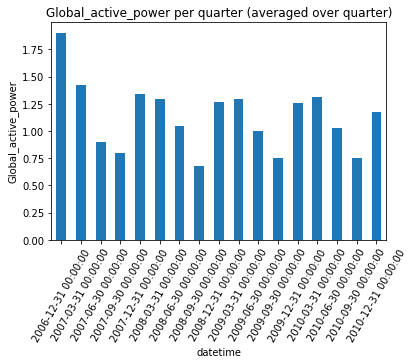

In [16]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

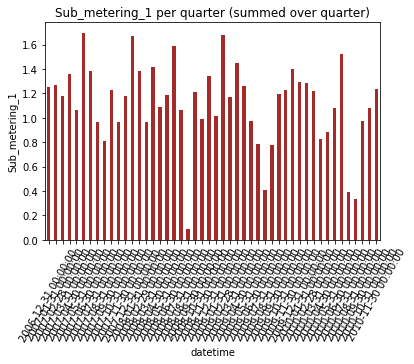

In [17]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

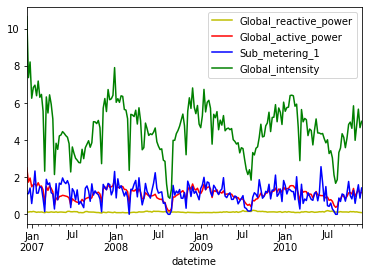

In [18]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

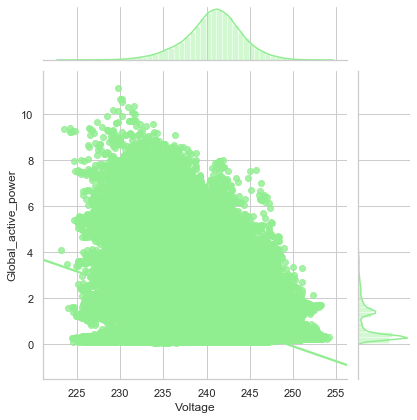

In [35]:
## The correlations between 'Voltage' and  'Global_active_power'
sb.jointplot(x='Voltage', y='Global_active_power', data=sf,color='lightgreen',kind='reg')  

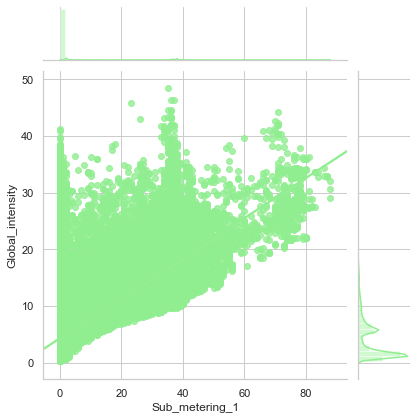

In [81]:
## The correlations between 'Voltage' and  'Global_active_power'
sb.jointplot(x='Sub_metering_1', y='Global_intensity', data=sf,color='lightgreen',kind='reg')  

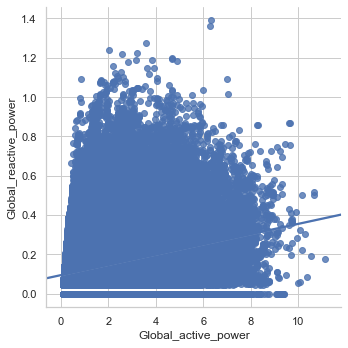

In [84]:
sb.lmplot(x="Global_active_power", y="Global_reactive_power", data=df)

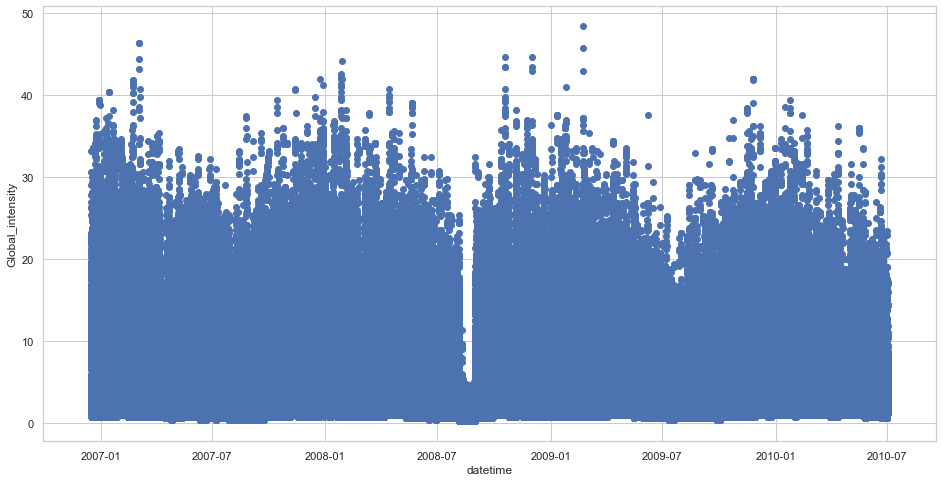

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['datetime'],sf['Global_intensity'])
ax.set_xlabel('datetime')
ax.set_ylabel('Global_intensity')
plt.show()

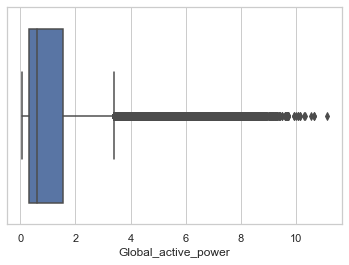

In [85]:
sb.boxplot(x=sf['Global_active_power'])

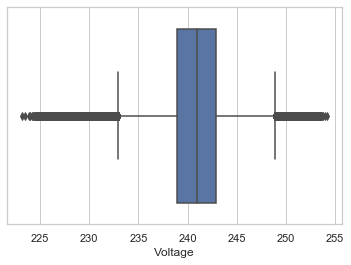

In [86]:
sb.boxplot(x=sf['Voltage'])

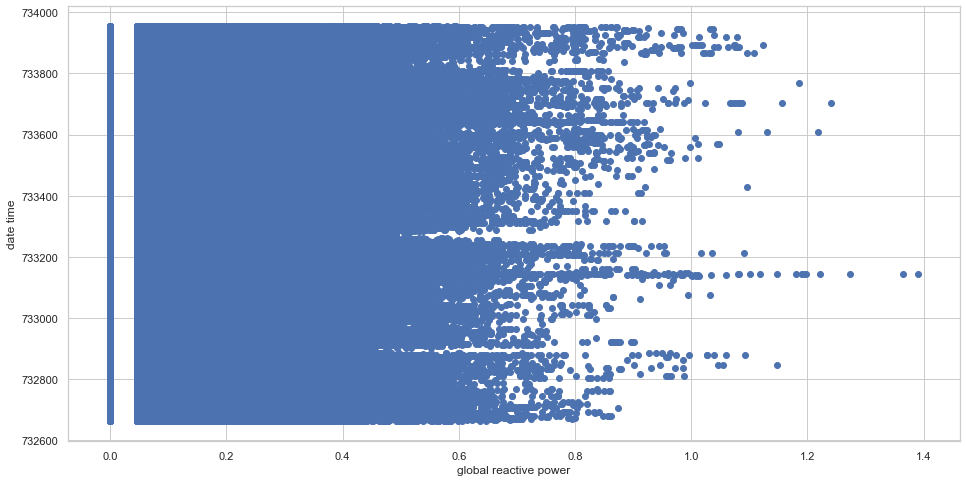

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(sf['Global_reactive_power'], sf['datetime'])
ax.set_xlabel('global reactive power')
ax.set_ylabel('date time')
plt.show()

## Data Cleaning

## Dropping unwanted features

In [11]:
# dropping "Unnamed: 0 " column
sf.drop(['Unnamed: 0'],axis=1,inplace=True)

### datetime to ordinal

In [12]:
# converting the date time column to ordinal
import datetime as dt
sf['datetime']=sf['datetime'].map(dt.datetime.toordinal)

## Resolving missing value

In [13]:
sf.isnull().sum()

datetime                    0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

### droping rows which has missing values in Global_intensity 

In [14]:
# droping rows which has missing values in Global_intensity 
gi_null=sf[sf['Global_intensity'].isnull()].index.tolist()
global_intensity_nan=sf.iloc[gi_null]

sf.dropna(subset=['Global_intensity'],inplace=True,axis=0)

### Resolving missing values using softimpute

In [15]:
colnam=sf.columns
print(colnam)
from fancyimpute import SoftImpute
si=SoftImpute()
sf=si.fit_transform(sf)
sf=pd.DataFrame(sf)
sf.columns=colnam
sf.head()

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


Using TensorFlow backend.


[SoftImpute] Max Singular Value of X_init = 1049340094.058895
[SoftImpute] Iter 1: observed MAE=1836.925638 rank=1
[SoftImpute] Iter 2: observed MAE=1836.901176 rank=1
[SoftImpute] Stopped after iteration 2 for lambda=20986801.881178


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,732661.0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,732661.0,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,732661.0,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,732661.0,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,732661.0,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Adding feature Global_intensity>15

In [16]:
a=sf['Global_intensity']
l=[]
for i in a:
    if(i>15):
        l.append(1)
    else:
        l.append(0)
    
sf['Global_intensity>15']=l
sf.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity>15
0,732661.0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1
1,732661.0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1
2,732661.0,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1
3,732661.0,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1
4,732661.0,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1


In [17]:
sf.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity>15
0,732661.0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1
1,732661.0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1
2,732661.0,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1
3,732661.0,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1
4,732661.0,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1


In [18]:
#slicing bottom 200000 observations 
valid_data=sf[-200000:]

In [19]:
# droping the bottom 200000 observations
sf.drop(sf.index[-200000:],axis=0,inplace=True)

##  Data Trasnsformation

In [20]:
# scaling the feature values
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=sf.drop(['Global_intensity','Global_intensity>15'],axis=1)
x=scale.fit_transform(x)

# Pre-processing

In [21]:
sf.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Global_intensity>15      0
dtype: int64

In [22]:
y=sf['Global_intensity']
y1=sf['Global_intensity>15']

In [23]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [24]:
# spliting data into train test to train the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=200)

# Modeling

In [25]:
from xgboost import XGBRegressor

In [26]:
xgb=XGBRegressor()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [28]:
%%time
xgb.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 2min 50s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [29]:
%%time
y_pre=xgb.predict(x_test)

Wall time: 1.37 s


In [30]:
x1=valid_data.drop(['Global_intensity','Global_intensity>15'],axis=1)
y2=valid_data['Global_intensity']

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x1=scale.fit_transform(x1)

In [33]:
%%time
y2_pre=xgb.predict(x1)

Wall time: 397 ms


In [41]:
from sklearn.metrics import mean_squared_error,r2_score
print("mean square error = ",mean_squared_error(y_test,y_pre))
print("r2 score= ",r2_score(y_test,y_pre))

mean square error =  0.0010339526222337707
r2 score=  0.9728861205679776


In [35]:
from xgboost import XGBClassifier

In [36]:
xgbc=XGBClassifier()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=200)

In [38]:
%%time
xgbc.fit(x_train,y_train)

Wall time: 2min 30s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
%%time
y_pre=xgbc.predict(x_test)

Wall time: 1.36 s


In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))
accuracy = accuracy_score(y_test, y_pre)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.9989660473777662
[[532045    132]
 [   441  21566]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    532177
           1       0.99      0.98      0.99     22007

    accuracy                           1.00    554184
   macro avg       1.00      0.99      0.99    554184
weighted avg       1.00      1.00      1.00    554184

Accuracy: 99.90%


# Hyper parameter tunning

In [42]:
from sklearn.model_selection import KFold,GridSearchCV

In [43]:
kfold=KFold(n_splits=5)
xgbc=XGBClassifier()
para={'n_estimators':[100,300,1000]}
xgg=GridSearchCV(xgbc,para,cv=kfold)

In [45]:
%%time
xgg.fit(x_train,y_train)

Wall time: 6h 18min 55s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=

In [46]:
print(xgg.best_params_)

{'n_estimators': 1000}


In [47]:
%%time
y_pre=xgg.predict(x_test)

Wall time: 15.7 s


In [48]:
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))
accuracy = accuracy_score(y_test, y_pre)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.9992818269744345
[[532070    107]
 [   291  21716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    532177
           1       1.00      0.99      0.99     22007

    accuracy                           1.00    554184
   macro avg       1.00      0.99      1.00    554184
weighted avg       1.00      1.00      1.00    554184

Accuracy: 99.93%


In [49]:
# regressor

In [50]:
kfold=KFold(n_splits=5)
xgbr=XGBRegressor()
para={'n_estimators':[2550,2600,2650],
     'objective':['reg:linear','reg:tweedie']
     }
xggr=GridSearchCV(xgbr,para,cv=kfold)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=200)

In [52]:
%%time
xggr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:56:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:30:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:45:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-pack

[01:03:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:30:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:58:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:26:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:54:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-pack

[05:47:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:15:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:44:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:12:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:41:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-pack

[10:37:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 16h 50min 46s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [2550, 2600, 2650]

In [53]:
%%time
y_pre=xggr.predict(x_test)

Wall time: 53.6 s


In [54]:
print(xggr.best_params_)
print(xggr.best_score_)

{'n_estimators': 2650, 'objective': 'reg:linear'}
0.9991072380991916


In [55]:
print("mean square error = ",mean_squared_error(y_test,y_pre))
print("r2 score= ",r2_score(y_test,y_pre))

mean square error =  0.016802970785410796
r2 score=  0.999175350014079


# results

### regression

In [56]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(n_estimators=2600)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [58]:
%%time
xgbr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:18:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 49min 28s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
%%time
y_pre=xgbr.predict(x_test)

Wall time: 26.5 s


In [60]:
test_accuracy=(xgbr.score(x_test,y_test))*100
test_accuracy

99.91890691741251

In [61]:
valid_x=valid_data.drop(['Global_intensity','Global_intensity>15'],axis=1)
valid_y=valid_data['Global_intensity']

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
valid_x=scale.fit_transform(valid_x)

In [62]:
valid_accuracy=(xgbr.score(valid_x,valid_y))*100
valid_accuracy

95.8615

### Classification

In [63]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(n_estimators=1000)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=200)

In [65]:
%%time
xgbc.fit(x_train,y_train)

Wall time: 19min 26s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
test_accuracy=(xgbc.score(x_test,y_test))*100
test_accuracy

99.92935559308822

In [67]:
valid_x1=valid_data.drop(['Global_intensity','Global_intensity>15'],axis=1)
valid_y1=valid_data['Global_intensity>15']
scale=StandardScaler()
valid_x1=scale.fit_transform(valid_x1)

In [68]:
%%time
valid_pre=xgbc.predict(valid_x1)

Wall time: 2.8 s


In [69]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(valid_y1,valid_pre)*100)

98.4215


In [70]:
print(classification_report(valid_y1,valid_pre))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    196426
           1       0.53      1.00      0.69      3574

    accuracy                           0.98    200000
   macro avg       0.77      0.99      0.84    200000
weighted avg       0.99      0.98      0.99    200000

